## DataLoader

In [3]:
import os
import glob
import torch
from PIL import Image
from torch.utils.data import Dataset

In [4]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        self.root_dir = root_dir
        self.transform = transform
        self.class_map = {'cats': 0, 'dogs': 1} #Classes name so that it will change from string to 0/1/2/3/4 depends on the cls
        self.data = []

        # Iterate over cat and dog folders
        #Dataset directory -> data/train/cats or data/train/dogs or data/test/cats or data/test/dogs
        #Dataset directory -> data/cats or data/dogs

        for class_name in self.class_map.keys():
            class_folder = os.path.join(root_dir, class_name)
            image_files = glob.glob(os.path.join(class_folder, '*.jpg'))

            for img_path in image_files:
                image = Image.open(img_path)
                self.data.append((image, self.class_map[class_name])) #image value and its class/label

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, class_id = self.data[idx]

        #class_id = torch.from_numpy(class_id)
        #class_id = torch.tensor(class_id).reshape(-1)

        if self.transform:
            image = self.transform(image)

        return image, class_id

## Model n Function

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [6]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc14 = nn.Linear(25088, 4096)
        self.fc15 = nn.Linear(4096, 4096)
        self.fc16 = nn.Linear(4096, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.maxpool(x)
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))
        x = self.maxpool(x)
        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = F.relu(self.conv13(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc14(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc15(x))
        x = F.dropout(x, 0.5)
        x = self.fc16(x)
        return x

In [7]:
# Pytorch Convolutional Neural Network Model Architecture
class CatnDogNet(nn.Module):

    def __init__(self):
        super().__init__()

        # onvolutional layers (3,16,32)
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size=(5, 5), stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=(5, 5), stride=2, padding=1)
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=(3, 3), padding=1)

        # conected layers
        self.fc1 = nn.Linear(in_features= 64 * 6 * 6, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=2)


    def forward(self, X):

        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2)

        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2)

        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2)

        X = X.view(X.shape[0], -1)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return X


In [17]:
from torchvision import transforms, models

def create_model_resnet18():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.fc = nn.Linear(model.fc.in_features, 2)
    return model

In [8]:
def evaluation(data):

    total, correct = 0,0
    model.eval()
    for i in data:
        inputs, labels = i
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

    return 100 * correct / total

## Main

In [9]:
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

## Pretraind True and False VGG16

In [25]:
transformt = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to a specific size
    transforms.ToTensor(),           # Convert to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),  # Normalize
])

val_dataset = CustomDataset(root_dir='test', transform=transformt)
train_dataset = CustomDataset(root_dir='train', transform=transformt)
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

images.shape: torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
labels tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0])


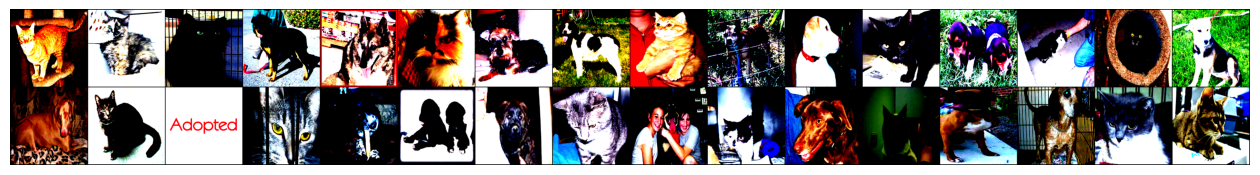

In [26]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

sample_image=iter(train_loader)
samples,labels=next(iter(sample_image))
print(samples.shape) #64 batch size, 1 channel, width 224 , height 224
print('labels',labels)

In [27]:
mod = models.vgg16(pretrained=True)

# Freeze the parameters of the pretrained model
for param in mod.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification (cats and dogs)
num_features = mod.classifier[6].in_features
mod.classifier[6] = nn.Linear(num_features, 2)  # Output has 2 classes (cats and dogs)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mod.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mod.to(device)

for epoch in range(num_epochs):
    mod.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mod(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model
mod.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mod(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 232MB/s]


Epoch 1/5, Loss: 0.0532
Epoch 2/5, Loss: 0.0397
Epoch 3/5, Loss: 0.0360
Epoch 4/5, Loss: 0.0354
Test Accuracy: 0.9892


Accuracy: 0.9892
Precision: 0.9927
Recall: 0.9856
F1-score: 0.9892


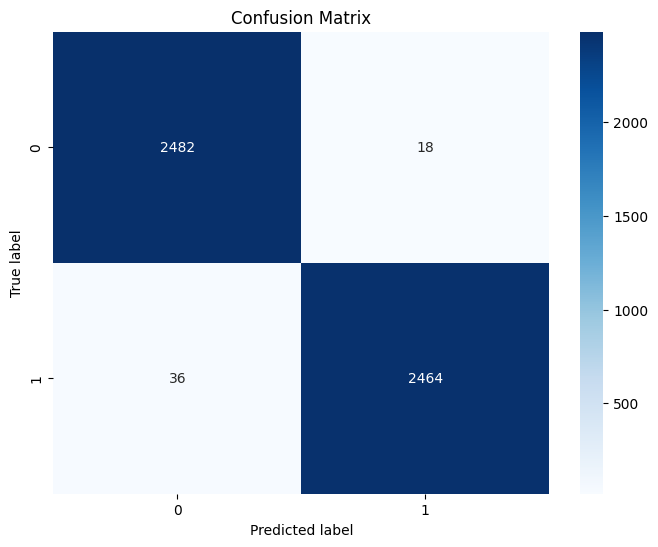

In [29]:
mod.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = mod(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Call the evaluate_model function
evaluate_model(y_true, y_pred)

In [30]:
torch.save(mod.state_dict(), "VGGMcatdog.pth")

In [ ]:
mod = models.vgg16(pretrained=False)

# Freeze the parameters of the pretrained model
for param in mod.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification (cats and dogs)
num_features = mod.classifier[6].in_features
mod.classifier[6] = nn.Linear(num_features, 2)  # Output has 2 classes (cats and dogs)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mod.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mod.to(device)

for epoch in range(num_epochs):
    mod.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mod(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model
mod.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mod(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/5, Loss: 0.6924
Epoch 2/5, Loss: 0.6893
Epoch 3/5, Loss: 0.6855
Epoch 4/5, Loss: 0.6831
Epoch 5/5, Loss: 0.6818
Test Accuracy: 0.6186


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

lr = 0.001
epochs = 5
batch_size = 32

model = VGG16().to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

cuda


In [ ]:
loss_val = []
train_accuracy = []
val_accuracy = []

loss_total = []
taccuracy_total = []
validaccuracy_total = []

for epoch in range(epochs):
    loss_epoch = 0
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        loss_temp = loss(outputs, labels)
        optimizer.zero_grad()

        loss_temp.backward()
        optimizer.step()

        loss_epoch += loss_temp.item()

        print(f'Epoch [{epoch+1}/{epochs}] || Step [{i+1}/{len(train_loader)}] || Loss:{loss_epoch/len(train_loader)}')

    #print(f"Loss at epoch {epoch+1} || {loss_epoch/len(train_loader)}")

    loss_val.append(loss_epoch/len(train_loader))
    train_accuracy.append(evaluation(train_loader))
    val_accuracy.append(evaluation(val_loader))
    print("Epoch {}: loss: {}, train accuracy: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], train_accuracy[-1], val_accuracy[-1]))

Epoch [1/50] || Step [1/125] || Loss:0.005542871952056885
Epoch [1/50] || Step [2/125] || Loss:0.01859440279006958
Epoch [1/50] || Step [3/125] || Loss:0.02461540937423706
Epoch [1/50] || Step [4/125] || Loss:0.03097788906097412
Epoch [1/50] || Step [5/125] || Loss:0.03663090562820435
Epoch [1/50] || Step [6/125] || Loss:0.04217956972122192
Epoch [1/50] || Step [7/125] || Loss:0.047672555923461916
Epoch [1/50] || Step [8/125] || Loss:0.05325931978225708
Epoch [1/50] || Step [9/125] || Loss:0.05896117115020752
Epoch [1/50] || Step [10/125] || Loss:0.06448871612548829
Epoch [1/50] || Step [11/125] || Loss:0.07034270668029785
Epoch [1/50] || Step [12/125] || Loss:0.07592529201507568
Epoch [1/50] || Step [13/125] || Loss:0.08143447875976563
Epoch [1/50] || Step [14/125] || Loss:0.0870505223274231
Epoch [1/50] || Step [15/125] || Loss:0.0927270188331604
Epoch [1/50] || Step [16/125] || Loss:0.09836757326126098
Epoch [1/50] || Step [17/125] || Loss:0.10396713256835938
Epoch [1/50] || Step [1

KeyboardInterrupt: 

In [ ]:
import time

batch_size=32
num_epochs=5
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VGG16()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))


torch.save(model.state_dict(), "VGGMnistLocal.pth") #SAVES THE TRAINED MODEL
model = VGG16()
model.load_state_dict(torch.load("VGGMnistLocal.pth")) #loads the trained model
model.eval()

Accuracy: 50.0%
Epoch 1: loss: 0.6934672157287598, val accuracy:50.0
Accuracy: 50.1%
Epoch 2: loss: 0.6932832880973816, val accuracy:50.1
Accuracy: 50.0%
Epoch 3: loss: 0.693280033493042, val accuracy:50.0
Accuracy: 49.24%
Epoch 4: loss: 0.6932530233383178, val accuracy:49.24
Accuracy: 50.0%
Epoch 5: loss: 0.693258085155487, val accuracy:50.0


VGG16(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3),

## CUSTOM NETWORK

images.shape: torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
labels tensor([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])


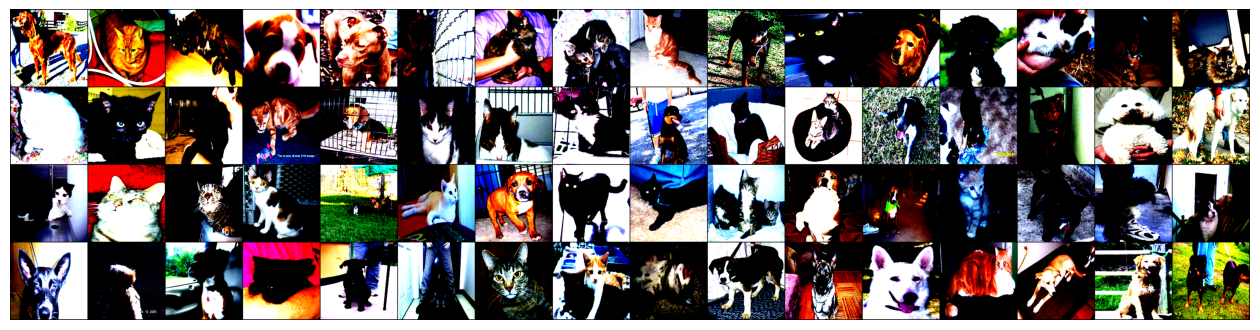

In [10]:
transformt = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to a specific size
    transforms.ToTensor(),           # Convert to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),  # Normalize
])

val_dataset = CustomDataset(root_dir='test', transform=transformt)
train_dataset = CustomDataset(root_dir='train', transform=transformt)
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

sample_image=iter(train_loader)
samples,labels=next(iter(sample_image))
print(samples.shape) #64 batch size, 1 channel, width 224 , height 224
print('labels',labels)

Accuracy: 0.8000
Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333


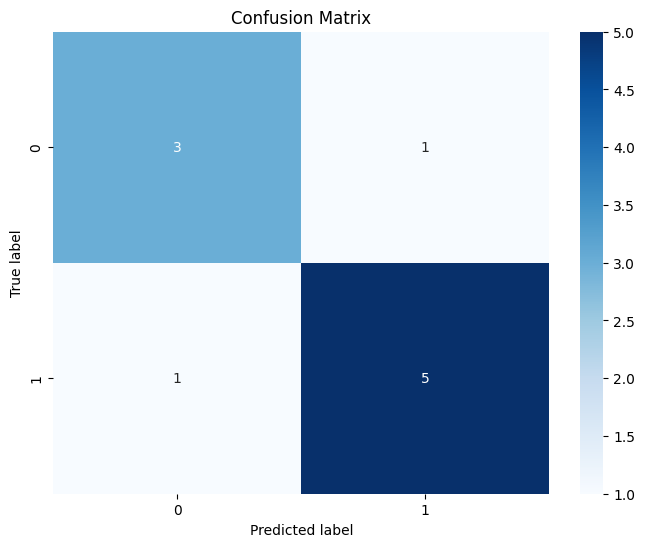

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_model(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Example usage
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]  # 0: cat, 1: dog
y_pred = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1]

evaluate_model(y_true, y_pred)

In [12]:
import time

batch_size=64
num_epochs=100
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))



Accuracy: 67.42%
Epoch 1: loss: 0.6448607241002896, val accuracy:67.42
Accuracy: 73.4%
Epoch 2: loss: 0.5770938631635123, val accuracy:73.4
Accuracy: 75.32%
Epoch 3: loss: 0.5273893152753385, val accuracy:75.32
Accuracy: 77.68%
Epoch 4: loss: 0.49115463986564367, val accuracy:77.68
Accuracy: 79.22%
Epoch 5: loss: 0.45882720602587007, val accuracy:79.22
Accuracy: 79.56%
Epoch 6: loss: 0.43980888703379767, val accuracy:79.56
Accuracy: 78.4%
Epoch 7: loss: 0.4237367357023227, val accuracy:78.4
Accuracy: 79.76%
Epoch 8: loss: 0.40418495394932197, val accuracy:79.76
Accuracy: 78.24%
Epoch 9: loss: 0.39204951044850456, val accuracy:78.24
Accuracy: 82.52%
Epoch 10: loss: 0.3705873788831333, val accuracy:82.52
Accuracy: 81.86%
Epoch 11: loss: 0.3555823232704839, val accuracy:81.86
Accuracy: 77.84%
Epoch 12: loss: 0.34174941941952935, val accuracy:77.84
Accuracy: 80.6%
Epoch 13: loss: 0.3265932134260385, val accuracy:80.6
Accuracy: 82.48%
Epoch 14: loss: 0.3081182913658337, val accuracy:82.48
A

Accuracy: 0.8308
Precision: 0.8403
Recall: 0.8168
F1-score: 0.8284


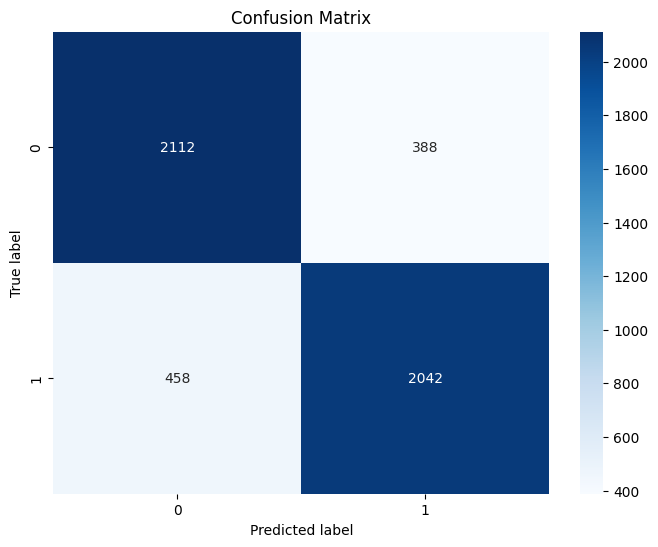

In [14]:
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Call the evaluate_model function
evaluate_model(y_true, y_pred)

# resnet18 pretrained

In [18]:
import time

batch_size=64
num_epochs=20
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = create_model_resnet18()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 80.9MB/s]


Accuracy: 52.58%
Epoch 1: loss: 0.3846811735496734, val accuracy:52.58
Accuracy: 52.84%
Epoch 2: loss: 0.1646443850601824, val accuracy:52.84
Accuracy: 52.86%
Epoch 3: loss: 0.12337114227513155, val accuracy:52.86
Accuracy: 52.58%
Epoch 4: loss: 0.10569551137213509, val accuracy:52.58
Accuracy: 52.82%
Epoch 5: loss: 0.095067687035083, val accuracy:52.82
Accuracy: 52.48%
Epoch 6: loss: 0.08926921916274598, val accuracy:52.48
Accuracy: 52.7%
Epoch 7: loss: 0.08304091691137694, val accuracy:52.7
Accuracy: 52.74%
Epoch 8: loss: 0.07860739763599996, val accuracy:52.74
Accuracy: 52.32%
Epoch 9: loss: 0.07580428019154091, val accuracy:52.32
Accuracy: 52.34%
Epoch 10: loss: 0.07388510727606261, val accuracy:52.34
Accuracy: 52.38%
Epoch 11: loss: 0.07436068445301285, val accuracy:52.38
Accuracy: 52.2%
Epoch 12: loss: 0.07119890886802262, val accuracy:52.2
Accuracy: 52.28%
Epoch 13: loss: 0.0677081254778055, val accuracy:52.28
Accuracy: 52.5%
Epoch 14: loss: 0.06710399136827967, val accuracy:52.

Accuracy: 0.7656
Precision: 0.9992
Recall: 0.5316
F1-score: 0.6940


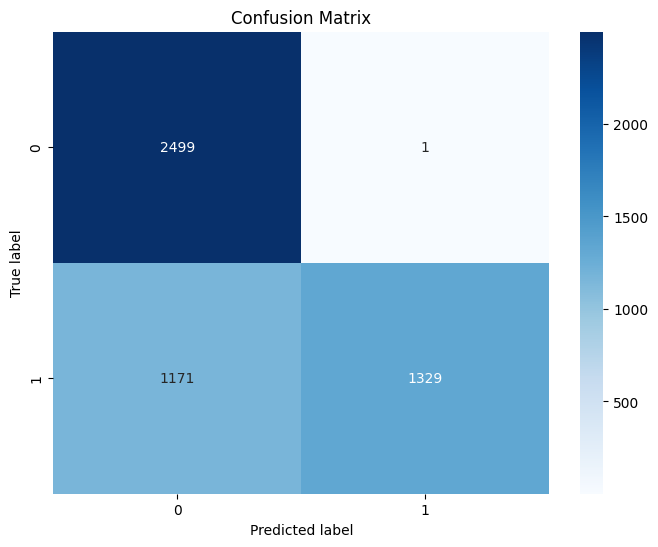

In [19]:
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Call the evaluate_model function
evaluate_model(y_true, y_pred)

# Densenet121 pretrained

In [23]:
from torch import optim
model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [24]:
import time

batch_size=64
num_epochs=20
lr=1e-4
class_size=2


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))



Accuracy: 51.88%
Epoch 1: loss: 0.09642107490622721, val accuracy:51.88
Accuracy: 52.96%
Epoch 2: loss: 0.04898639547730835, val accuracy:52.96
Accuracy: 52.12%
Epoch 3: loss: 0.05934751472757986, val accuracy:52.12
Accuracy: 52.82%
Epoch 4: loss: 0.0410862422972983, val accuracy:52.82
Accuracy: 53.54%
Epoch 5: loss: 0.04766725919048745, val accuracy:53.54
Accuracy: 53.3%
Epoch 6: loss: 0.04139952211062046, val accuracy:53.3
Accuracy: 54.46%
Epoch 7: loss: 0.046873244005186596, val accuracy:54.46
Accuracy: 54.2%
Epoch 8: loss: 0.0420190684561329, val accuracy:54.2
Accuracy: 54.68%
Epoch 9: loss: 0.03908249494144894, val accuracy:54.68
Accuracy: 53.88%
Epoch 10: loss: 0.03687518143470543, val accuracy:53.88
Accuracy: 55.54%
Epoch 11: loss: 0.03910077300860722, val accuracy:55.54
Accuracy: 55.16%
Epoch 12: loss: 0.038553705845588294, val accuracy:55.16
Accuracy: 55.36%
Epoch 13: loss: 0.03750276115813892, val accuracy:55.36
Accuracy: 56.76%
Epoch 14: loss: 0.03463252971042543, val accura

# paws

In [ ]:
import time

batch_size=32
num_epochs=10
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))

Accuracy: 71.74%
Epoch 1: loss: 0.6248063238620758, val accuracy:71.74
Accuracy: 76.22%
Epoch 2: loss: 0.533168613243103, val accuracy:76.22
Accuracy: 78.8%
Epoch 3: loss: 0.48050669341087343, val accuracy:78.8
Accuracy: 79.2%
Epoch 4: loss: 0.4415585683822632, val accuracy:79.2
Accuracy: 80.94%
Epoch 5: loss: 0.4107740276813507, val accuracy:80.94
Accuracy: 80.04%
Epoch 6: loss: 0.38248078272342684, val accuracy:80.04
Accuracy: 80.74%
Epoch 7: loss: 0.35827977409362793, val accuracy:80.74
Accuracy: 82.94%
Epoch 8: loss: 0.33662985439300536, val accuracy:82.94
Accuracy: 81.14%
Epoch 9: loss: 0.3123514895319939, val accuracy:81.14
Accuracy: 83.72%
Epoch 10: loss: 0.2896564145565033, val accuracy:83.72


## CUSTOM NETWORK WITH SIFT OVERLAY

In [ ]:
import cv2
import numpy as np
def extract_sift(image):
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)

    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    return img_with_keypoints#descriptors

images.shape: torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
labels tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0])


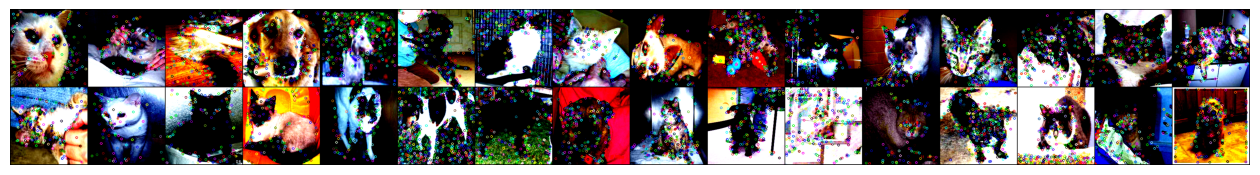

In [ ]:
transformt = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to a specific size
    transforms.Lambda(lambda x: extract_sift(x)),  # Apply SIFT feature extraction
    transforms.ToTensor(),           # Convert to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),  # Normalize
])

val_dataset = CustomDataset(root_dir='test', transform=transformt)
train_dataset = CustomDataset(root_dir='train', transform=transformt)
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

#train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

sample_image=iter(train_loader)
samples,labels=next(iter(sample_image))
print(samples.shape) #64 batch size, 1 channel, width 224 , height 224
print('labels',labels)

In [ ]:
import time

batch_size=32
num_epochs=10
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))

Accuracy: 71.34%
Epoch 1: loss: 0.6276303789138794, val accuracy:71.34
Accuracy: 74.9%
Epoch 2: loss: 0.5452023183822632, val accuracy:74.9
Accuracy: 76.98%
Epoch 3: loss: 0.5000683773040772, val accuracy:76.98
Accuracy: 78.64%
Epoch 4: loss: 0.47124395179748535, val accuracy:78.64
Accuracy: 79.44%
Epoch 5: loss: 0.44541441094875334, val accuracy:79.44
Accuracy: 76.82%
Epoch 6: loss: 0.4161932418823242, val accuracy:76.82
Accuracy: 79.64%
Epoch 7: loss: 0.39618941702842714, val accuracy:79.64
Accuracy: 79.18%
Epoch 8: loss: 0.36805199072360995, val accuracy:79.18
Accuracy: 80.2%
Epoch 9: loss: 0.3427085680961609, val accuracy:80.2
Accuracy: 81.08%
Epoch 10: loss: 0.3084911099076271, val accuracy:81.08


In [ ]:
import time

batch_size=32
num_epochs=20
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))

Accuracy: 70.96%
Epoch 1: loss: 0.6213937845230103, val accuracy:70.96
Accuracy: 73.48%
Epoch 2: loss: 0.5507481097698211, val accuracy:73.48
Accuracy: 76.46%
Epoch 3: loss: 0.5076557051181794, val accuracy:76.46
Accuracy: 77.62%
Epoch 4: loss: 0.48121735911369323, val accuracy:77.62
Accuracy: 77.9%
Epoch 5: loss: 0.4557078486919403, val accuracy:77.9
Accuracy: 77.74%
Epoch 6: loss: 0.4348908092737198, val accuracy:77.74
Accuracy: 78.46%
Epoch 7: loss: 0.40898235371112823, val accuracy:78.46
Accuracy: 79.14%
Epoch 8: loss: 0.3822941854953766, val accuracy:79.14
Accuracy: 79.16%
Epoch 9: loss: 0.3572911158561706, val accuracy:79.16
Accuracy: 79.64%
Epoch 10: loss: 0.32718259340524675, val accuracy:79.64
Accuracy: 79.42%
Epoch 11: loss: 0.2949247364759445, val accuracy:79.42
Accuracy: 80.18%
Epoch 12: loss: 0.26329843353033067, val accuracy:80.18
Accuracy: 78.26%
Epoch 13: loss: 0.23113859661221503, val accuracy:78.26
Accuracy: 79.42%
Epoch 14: loss: 0.1930877106666565, val accuracy:79.4

## bersahil!!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Imagenet mean and std
])

# Load dataset
train_dataset = datasets.ImageFolder(root='train', transform=transform)
test_dataset = datasets.ImageFolder(root='test', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

images.shape: torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
labels tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


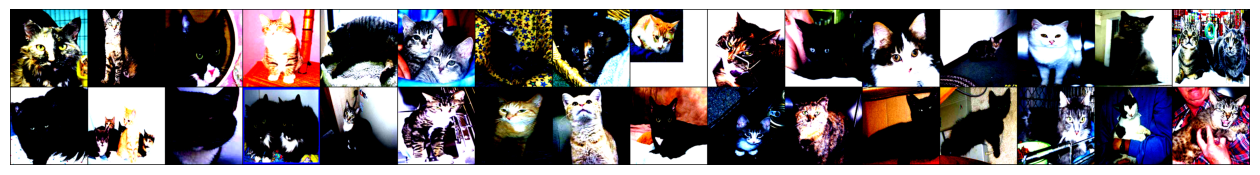

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in test_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

sample_image=iter(test_loader)
samples,labels=next(iter(sample_image))
print(samples.shape) #64 batch size, 1 channel, width 224 , height 224
print('labels',labels)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Imagenet mean and std
])

# Load dataset
train_dataset = datasets.ImageFolder(root='train', transform=transform)
test_dataset = datasets.ImageFolder(root='test', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Freeze the parameters of the pretrained model
for param in vgg16.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification (cats and dogs)
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 2)  # Output has 2 classes (cats and dogs)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

for epoch in range(num_epochs):
    vgg16.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate the model
vgg16.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.0523
Epoch 2/10, Loss: 0.0406
Epoch 3/10, Loss: 0.0372
Epoch 4/10, Loss: 0.0347
Epoch 5/10, Loss: 0.0336
Epoch 6/10, Loss: 0.0333
Epoch 7/10, Loss: 0.0324
Epoch 8/10, Loss: 0.0312
Epoch 9/10, Loss: 0.0309
Epoch 10/10, Loss: 0.0296
Test Accuracy: 0.9882


In [ ]:
torch.save(vgg16.state_dict(), "VGGcatdog.pth") #SAVES THE TRAINED MODEL


In [ ]:
torch.save(model, 'model.pth')

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
#model = models.vgg16(pretrained=False)  # Assuming you're using the same architecture as your saved model
#model.load_state_dict(torch.load('VGGcatdog.pth', map_location=torch.device('cpu')))  # Load the saved model weights
modelq = models.vgg16(pretrained=True)
for param in modelq.parameters():
    param.requires_grad = False

# Modify the last fully connected layer for binary classification (cats and dogs)
num_features = modelq.classifier[6].in_features
modelq.classifier[6] = nn.Linear(num_features, 2)


modelq.load_state_dict(torch.load("VGGcatdog.pth")) #loads the trained model
modelq.eval()  # Set the model to evaluation mode

# Define data transformation for the new image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the input size expected by the model
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Load and preprocess the new image
image = Image.open('dobelcat.jpg')  # Load the new image
image = transform(image).unsqueeze(0)  # Apply transformations and add batch dimension
image = image.to(device)
# Forward pass through the model
with torch.no_grad():
    outputs = vgg16(image)

# Interpret the predictions
_, predicted = torch.max(outputs, 1)
class_index = predicted.item()

# Assuming you have a list of class labels
class_labels = ['cat', 'dog']  # Update with your actual class labels

# Get the predicted class label
predicted_label = class_labels[class_index]

print("Predicted class:", predicted_label)


Predicted class: cat


## gaussian blured customnet

In [ ]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from skimage.feature import hog


# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.Lambda(lambda x: extract_hog(x)),  # Apply SIFT feature extraction
    transforms.GaussianBlur(kernel_size=5, sigma=(5)),  # Apply Gaussian blur
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Imagenet mean and std
])

# Load dataset
train_dataset = datasets.ImageFolder(root='train', transform=transform)
test_dataset = datasets.ImageFolder(root='test', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

images.shape: torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
labels tensor([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0])


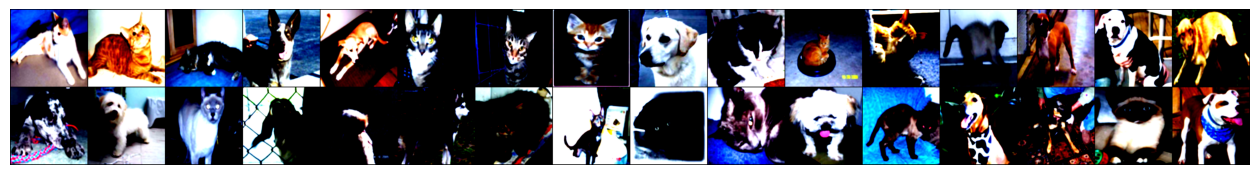

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

sample_image=iter(train_loader)
samples,labels=next(iter(sample_image))
print(samples.shape) #64 batch size, 1 channel, width 224 , height 224
print('labels',labels)

In [ ]:
import time

batch_size=32
num_epochs=10
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))

Accuracy: 70.94%
Epoch 1: loss: 0.6183033273220062, val accuracy:70.94
Accuracy: 75.36%
Epoch 2: loss: 0.5413031358718872, val accuracy:75.36
Accuracy: 77.12%
Epoch 3: loss: 0.4994551125526428, val accuracy:77.12
Accuracy: 77.7%
Epoch 4: loss: 0.46579902255535127, val accuracy:77.7
Accuracy: 77.64%
Epoch 5: loss: 0.43954991788864134, val accuracy:77.64
Accuracy: 79.7%
Epoch 6: loss: 0.4151758212327957, val accuracy:79.7
Accuracy: 79.52%
Epoch 7: loss: 0.3883780331134796, val accuracy:79.52
Accuracy: 80.7%
Epoch 8: loss: 0.3648408495664597, val accuracy:80.7
Accuracy: 80.98%
Epoch 9: loss: 0.332160630273819, val accuracy:80.98
Accuracy: 79.3%
Epoch 10: loss: 0.3018897478580475, val accuracy:79.3


In [ ]:
import time

batch_size=32
num_epochs=20
lr=1e-4
class_size=2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CatnDogNet()
model = model.to(device=device)
load_model = True
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= lr)


loss_val = []
val_accuracy = []

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()

        #print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}     TimeStamp: {}' .format(epoch+1, num_epochs, i+1, len(train_loader), loss_var/len(train_loader), time.time()))

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs


        val_accuracy.append(100 * correct / total)
        print('Accuracy: {}%'.format(100 * correct / total))

    loss_val.append(loss_var/len(train_loader))
    print("Epoch {}: loss: {}, val accuracy:{}".format(epoch + 1, loss_val[-1], val_accuracy[-1]))

Accuracy: 69.16%
Epoch 1: loss: 0.6278153160572052, val accuracy:69.16
Accuracy: 74.46%
Epoch 2: loss: 0.5408511563777924, val accuracy:74.46
Accuracy: 77.5%
Epoch 3: loss: 0.49170054035186767, val accuracy:77.5
Accuracy: 79.08%
Epoch 4: loss: 0.4590041985988617, val accuracy:79.08
Accuracy: 79.66%
Epoch 5: loss: 0.43043548316955565, val accuracy:79.66
Accuracy: 80.38%
Epoch 6: loss: 0.40416153099536894, val accuracy:80.38
Accuracy: 81.42%
Epoch 7: loss: 0.37474885380268097, val accuracy:81.42
Accuracy: 80.84%
Epoch 8: loss: 0.3470602862238884, val accuracy:80.84
Accuracy: 81.78%
Epoch 9: loss: 0.3122429678797722, val accuracy:81.78
Accuracy: 81.04%
Epoch 10: loss: 0.2771353122115135, val accuracy:81.04
Accuracy: 79.88%
Epoch 11: loss: 0.24223480343222617, val accuracy:79.88
Accuracy: 80.3%
Epoch 12: loss: 0.20786206828355788, val accuracy:80.3
Accuracy: 80.5%
Epoch 13: loss: 0.1686696220099926, val accuracy:80.5
Accuracy: 80.84%
Epoch 14: loss: 0.12861908284127713, val accuracy:80.84
